# Common inputs

In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import albumentations as A

# Step 1 - Reading the data

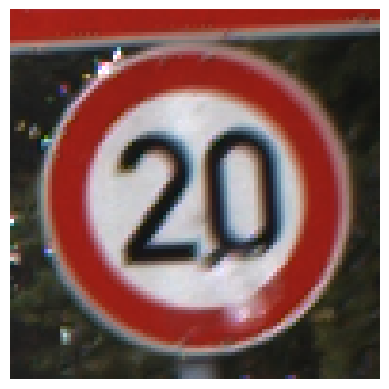

In [39]:
def read_and_display_images(image_path):
    # Read the image
    img = cv2.imread(image_path)

    # OpenCV reads images in BGR format, convert it to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()
    return img_rgb

image_path = "./dataset/GTSRB/Final_Training/Images/00000/00000_00026.ppm"
sign_image = read_and_display_images(image_path)

# Applying rain filter

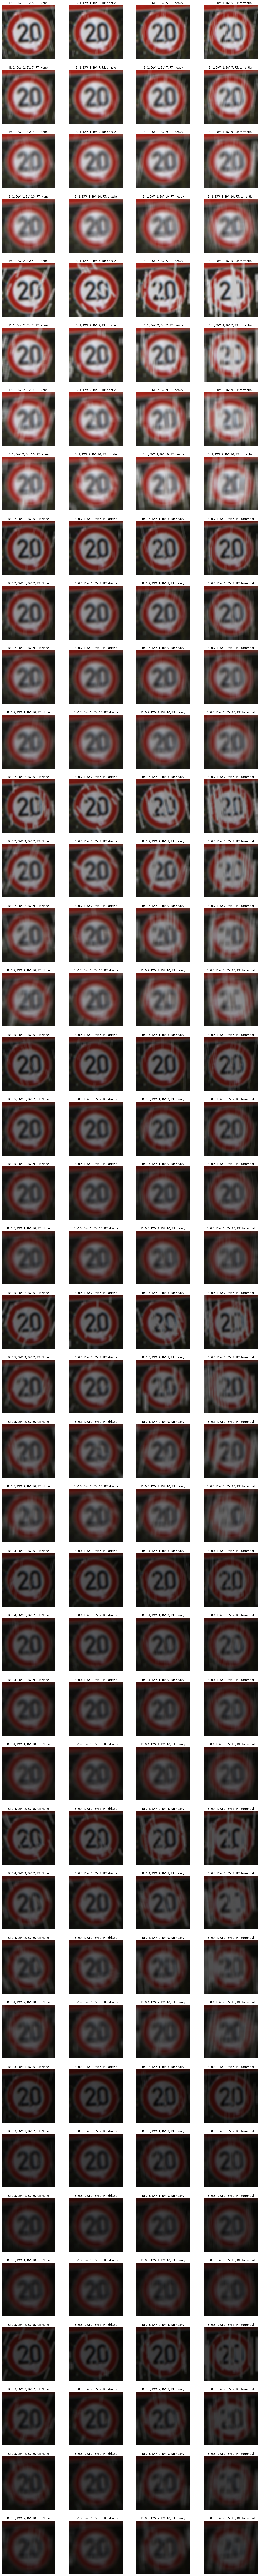

In [62]:
# List to store transformed images
transformed_images = []

# List of parameters
brightness_coefficients = [1, 0.7, 0.5, 0.4, 0.3]
drop_width_values = [1,2]
blur_values = [5,7,9,10]
rain_types = [None, 'drizzle', 'heavy', 'torrential']

# Original image
original_image = sign_image

# Apply transformations for each combination of parameters
for brightness_coefficient in brightness_coefficients:
    for drop_width in drop_width_values:
        for blur_value in blur_values:
            for rain_type in rain_types:
                transform_image = A.Compose([
                    A.RandomRain(brightness_coefficient=brightness_coefficient,
                                 drop_width=drop_width, blur_value=blur_value,
                                 p=1, rain_type=rain_type)
                ])
                transformed = transform_image(image=original_image)
                transformed_images.append((transformed['image'], brightness_coefficient, drop_width, blur_value, rain_type))

# Display all transformed images
plt.figure(figsize=(20, 5*len(drop_width_values)*len(blur_values)*len(brightness_coefficients)))
num_images = len(transformed_images)
rows = num_images // 4 + (1 if num_images % 4 > 0 else 0)
for i, (image, brightness, drop_width, blur, rain_type) in enumerate(transformed_images):
    plt.subplot(rows, 4, i + 1)
    plt.imshow(image)
    plt.title(f"B: {brightness}, DW: {drop_width}, BV: {blur}, RT: {rain_type}")
    plt.axis('off')

plt.show()

# Spatter

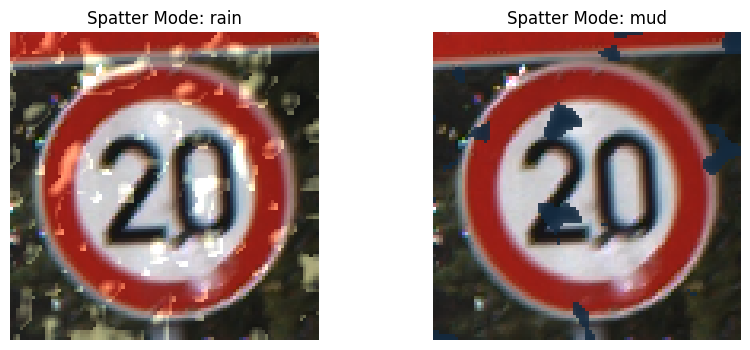

In [107]:
# List to store transformed images
transformed_images = []

# List of parameters
spatter_modes = ['rain', 'mud']

# Original image
original_image = sign_image

for spatter_mode in spatter_modes:
# Apply transformations for each combination of parameters
    transform_image = A.Compose([
        A.Spatter(p=1.0, mode=spatter_mode)
    ])
    transformed = transform_image(image=original_image)
    transformed_images.append((transformed['image'], spatter_mode))

# Display all transformed images
plt.figure(figsize=(10, 4))
num_images = len(transformed_images)
for i, (image, spatter_mode) in enumerate(transformed_images):
    plt.subplot(1, 2, i + 1)
    plt.imshow(image)
    plt.title(f"Spatter Mode: {spatter_mode}")
    plt.axis('off')

plt.show()